# Run Any Kind of Logistic Regression (Binomial, Multinomial, etc.)

### Authors: Calvin Howard.

#### Last updated: March 16, 2024

Use this to run/test a statistical model on a spreadsheet.

Notes:
- To best use this notebook, you should be familar with GLM design and Contrast Matrix design. See this webpage to get started:
[FSL's GLM page](https://fsl.fmrib.ox.ac.uk/fsl/fslwiki/GLM)

# 00 - Import CSV with All Data
**The CSV is expected to be in this format**
- ID and absolute paths to niftis are critical
```
+-----+----------------------------+--------------+--------------+--------------+
| ID  | Nifti_File_Path            | Covariate_1  | Covariate_2  | Covariate_3  |
+-----+----------------------------+--------------+--------------+--------------+
| 1   | /path/to/file1.nii.gz      | 0.5          | 1.2          | 3.4          |
| 2   | /path/to/file2.nii.gz      | 0.7          | 1.4          | 3.1          |
| 3   | /path/to/file3.nii.gz      | 0.6          | 1.5          | 3.5          |
| 4   | /path/to/file4.nii.gz      | 0.9          | 1.1          | 3.2          |
| ... | ...                        | ...          | ...          | ...          |
+-----+----------------------------+--------------+--------------+--------------+
```

Prep Output Directory

In [151]:
# Specify where you want to save your results to
out_dir = '/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/atrophy_seeds_2023/Figures/diagnostic_ability/200fit_500pred'

Import Data

In [152]:
# Specify the path to your CSV file containing NIFTI paths
input_csv_path = '/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/atrophy_seeds_2023/metadata/atrophy_roi_scores/master_list_w_only_unthresholded.csv'
sheet = None

In [153]:
from calvin_utils.permutation_analysis_utils.statsmodels_palm import CalvinStatsmodelsPalm
# Instantiate the PalmPrepararation class
cal_palm = CalvinStatsmodelsPalm(input_csv_path=input_csv_path, output_dir=out_dir, sheet=sheet)
# Call the process_nifti_paths method
data_df = cal_palm.read_and_display_data()

,subject,Age,Sex,Cerebellum_WM_Wscore,Cortex_WM_Wscore,Subcortex_WM_Wscore,Temporal_WM_Wscore,WholeBrain_WM_Wscore,MTL_WM_Wscore,Occipital_WM_Wscore,...,Q7,Q8,Q9,Q10,Q11,Q12,Q14,TOTAL11,TOTALMOD,Diagnosis
0,1,65.230137,0.0,-20610.832540,-70339.034050,-53376.985520,-20185.464320,-145664.729700,-470.613228,-23102.618190,...,0.0,0,0.0,0.0,0.0,0.0,0.0,3.00,6.00,Control
1,2,70.578082,0.0,2765.060425,-17584.148380,-26300.293480,-3373.772445,-42094.822380,-37.815819,-4393.103538,...,0.0,5,0.0,0.0,0.0,0.0,0.0,9.00,13.00,Control
2,3,87.873973,1.0,-8792.022787,-92484.138980,-90743.572730,-22799.368760,-194937.684700,-821.514437,-20178.191490,...,6.0,#,0.0,1.0,0.0,0.0,1.0,24.00,35.00,MCI
3,4,79.934247,1.0,-9736.473769,-11011.932230,17747.896500,-517.970904,-1357.593538,528.475834,-5015.983389,...,0.0,5,0.0,0.0,0.0,0.0,1.0,9.67,17.67,Alzheimer
4,5,69.791781,0.0,7048.546383,5867.714162,4310.803429,7268.488353,17787.741390,434.390405,-250.276119,...,0.0,0,0.0,0.0,0.0,0.0,1.0,2.00,5.00,MCI
5,6,76.509589,1.0,8364.023861,12676.430820,25187.235790,6730.836797,47887.981630,475.053061,6793.849162,...,0.0,0,0.0,0.0,1.0,0.0,0.0,2.33,4.33,Alzheimer
6,7,81.169863,0.0,13107.339510,-4917.097893,5955.178044,1838.649728,14561.226050,76.438451,-12179.208510,...,0.0,3,0.0,0.0,0.0,0.0,0.0,5.00,7.00,MCI
7,8,82.646575,1.0,460.651185,-18651.317510,-16472.795760,-5605.871372,-34987.733460,-102.340751,-11993.318150,...,1.0,3,0.0,0.0,1.0,1.0,1.0,12.00,22.00,Alzheimer
8,9,77.347945,1.0,10023.712700,27766.219960,36098.489050,7516.597104,75716.340270,455.018907,11718.870060,...,0.0,2,0.0,0.0,1.0,0.0,0.0,10.33,14.33,MCI
9,10,79.712329,1.0,-14747.251470,-89236.535900,-95877.124510,-22948.525500,-202456.367800,-387.608419,-27311.688270,...,0.0,2,0.0,0.0,0.0,0.0,0.0,7.00,14.00,Control


# 01 - Preprocess Your Data

**Handle NANs**
- Set drop_nans=True is you would like to remove NaNs from data
- Provide a column name or a list of column names to remove NaNs from

In [155]:
drop_list = ['Diagnosis', 'Occipital_WM_Wscore']

In [156]:
data_df = cal_palm.drop_nans_from_columns(columns_to_drop_from=drop_list)
display(data_df)

,subject,Age,Sex,Cerebellum_WM_Wscore,Cortex_WM_Wscore,Subcortex_WM_Wscore,Temporal_WM_Wscore,WholeBrain_WM_Wscore,MTL_WM_Wscore,Occipital_WM_Wscore,...,Q7,Q8,Q9,Q10,Q11,Q12,Q14,TOTAL11,TOTALMOD,Diagnosis
0,1,65.230137,0.0,-20610.832540,-70339.034050,-53376.985520,-20185.464320,-145664.729700,-470.613228,-23102.618190,...,0.0,0,0.0,0.0,0.0,0.0,0.0,3.00,6.00,Control
1,2,70.578082,0.0,2765.060425,-17584.148380,-26300.293480,-3373.772445,-42094.822380,-37.815819,-4393.103538,...,0.0,5,0.0,0.0,0.0,0.0,0.0,9.00,13.00,Control
2,3,87.873973,1.0,-8792.022787,-92484.138980,-90743.572730,-22799.368760,-194937.684700,-821.514437,-20178.191490,...,6.0,#,0.0,1.0,0.0,0.0,1.0,24.00,35.00,MCI
3,4,79.934247,1.0,-9736.473769,-11011.932230,17747.896500,-517.970904,-1357.593538,528.475834,-5015.983389,...,0.0,5,0.0,0.0,0.0,0.0,1.0,9.67,17.67,Alzheimer
4,5,69.791781,0.0,7048.546383,5867.714162,4310.803429,7268.488353,17787.741390,434.390405,-250.276119,...,0.0,0,0.0,0.0,0.0,0.0,1.0,2.00,5.00,MCI
5,6,76.509589,1.0,8364.023861,12676.430820,25187.235790,6730.836797,47887.981630,475.053061,6793.849162,...,0.0,0,0.0,0.0,1.0,0.0,0.0,2.33,4.33,Alzheimer
6,7,81.169863,0.0,13107.339510,-4917.097893,5955.178044,1838.649728,14561.226050,76.438451,-12179.208510,...,0.0,3,0.0,0.0,0.0,0.0,0.0,5.00,7.00,MCI
7,8,82.646575,1.0,460.651185,-18651.317510,-16472.795760,-5605.871372,-34987.733460,-102.340751,-11993.318150,...,1.0,3,0.0,0.0,1.0,1.0,1.0,12.00,22.00,Alzheimer
8,9,77.347945,1.0,10023.712700,27766.219960,36098.489050,7516.597104,75716.340270,455.018907,11718.870060,...,0.0,2,0.0,0.0,1.0,0.0,0.0,10.33,14.33,MCI
9,10,79.712329,1.0,-14747.251470,-89236.535900,-95877.124510,-22948.525500,-202456.367800,-387.608419,-27311.688270,...,0.0,2,0.0,0.0,0.0,0.0,0.0,7.00,14.00,Control


**Drop Row Based on Value of Column**

Define the column, condition, and value for dropping rows
- column = 'your_column_name'
- condition = 'above'  # Options: 'equal', 'above', 'below'

In [157]:
data_df.columns

Index(['subject', 'Age', 'Sex', 'Cerebellum_WM_Wscore', 'Cortex_WM_Wscore',
       'Subcortex_WM_Wscore', 'Temporal_WM_Wscore', 'WholeBrain_WM_Wscore',
       'MTL_WM_Wscore', 'Occipital_WM_Wscore', 'Frontal_WM_Wscore',
       'Parietal_WM_Wscore', 'Insula_WM_Wscore', 'temp_ins_WM_Wscore',
       'Cerebellum_GM_Wscore', 'Cortex_GM_Wscore', 'Subcortex_GM_Wscore',
       'Temporal_GM_Wscore', 'WholeBrain_GM_Wscore', 'MTL_GM_Wscore',
       'Occipital_GM_Wscore', 'Frontal_GM_Wscore', 'Parietal_GM_Wscore',
       'Insula_GM_Wscore', 'temp_ins_GM_Wscore', 'Cerebellum_CSF_Wscore',
       'Cortex_CSF_Wscore', 'Subcortex_CSF_Wscore', 'Temporal_CSF_Wscore',
       'WholeBrain_CSF_Wscore', 'MTL_CSF_Wscore', 'Occipital_CSF_Wscore',
       'Frontal_CSF_Wscore', 'Parietal_CSF_Wscore', 'Insula_CSF_Wscore',
       'temp_ins_CSF_Wscore', 'frontal_eh', 'temporal_eh', 'parietal_eh',
       'occipital_eh', 'cerebellum_eh', 'mesial_temporal_eh', 'ventricle_eh',
       'Cerebellum_CT_Wscore', 'Cortex_CT_Ws

Set the parameters for dropping rows

In [158]:
column = 'Cohort'  # The column you'd like to evaluate
condition = 'equal'  # The condition to check ('equal', 'above', 'below', 'not')
value = 2 # The value to drop if found

In [35]:
data_df, other_df = cal_palm.drop_rows_based_on_value(column, condition, value)
display(data_df)

,Unnamed__0,subid,CSF_Cerebellum,CSF_Subcortex,CSF_MTL,CSF_Occipital,CSF_Frontal,CSF_Parietal,CSF_Temporal,GM_Cerebellum,...,TOTAL11,TOTALMOD,DX_BASELINE,DX_M12,DIAGNOSIS_BL,DIAGNOSIS_CURRENT,DIAGNOSIS_M12,DIAGNOSIS_BL_Str,DIAGNOSIS_CURRENT_Str,DIAGNOSIS_M12_Str
0,50,002_S_0295,-26319.381520,373.297842,-746.688684,-24081.964640,-32607.592110,-18245.868460,-32777.02389,-23248.955500,...,3.00,4.00,Normal,Normal,1.0,1.0,1.0,Normal,Normal,Normal
1,51,002_S_0413,-13670.888710,5009.504947,-449.838607,-8185.340726,-13903.977170,-6191.852471,-13476.49339,-4562.384254,...,3.33,4.33,Normal,Normal,1.0,1.0,1.0,Normal,Normal,Normal
2,58,002_S_0954,-27912.718120,267.960111,-26.245064,-14384.382220,1174.325661,-13108.994170,-11969.39547,24935.280210,...,10.67,21.67,MCI,Alzheimer,2.0,3.0,3.0,MCI,Alzheimer,Alzheimer
3,71,003_S_1057,-3441.984646,8102.022733,-157.009052,-11631.937370,-11106.858210,-14756.563150,-14732.64218,2344.896594,...,11.33,20.33,MCI,MCI,2.0,3.0,2.0,MCI,Alzheimer,MCI
4,74,003_S_1122,-9127.083112,8399.639128,-57.383241,-11919.752740,1985.249349,-7048.794398,-11818.70872,25139.920610,...,5.00,9.00,MCI,MCI,2.0,2.0,2.0,MCI,MCI,MCI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,542,114_S_0228,-26706.829570,-18673.421780,-3494.089241,-23203.940710,-34536.844220,-20813.726580,-56633.52899,9781.066973,...,28.00,36.00,Alzheimer,NaN,3.0,3.0,NaN,Alzheimer,Alzheimer,NaN
195,673,131_S_0497,-43453.645100,-22245.672250,-1357.231803,-38006.716590,-61940.859690,-53163.666300,-60064.72719,-20898.817900,...,23.33,-4.00,Alzheimer,Alzheimer,3.0,3.0,3.0,Alzheimer,Alzheimer,Alzheimer
196,3,005_S_0929,-28275.840420,-25648.060410,-1012.176405,-42260.667880,-46921.094040,-53586.582100,-49485.49243,-187.220482,...,11.67,20.67,Alzheimer,Control,3.0,3.0,3.0,Alzheimer,Alzheimer,Alzheimer
197,13,016_S_0769,-24860.874760,-10908.867390,-1683.741516,-40194.105520,-55082.290760,-45684.366490,-47028.35005,-55147.978240,...,9.33,12.33,MCI,Control,2.0,3.0,2.0,MCI,Alzheimer,MCI


**Standardize Data**
- Enter Columns you Don't want to standardize into a list

In [19]:
# Remove anything you don't want to standardize
cols_not_to_standardize = ['DX_M12'] # ['Z_Scored_Percent_Cognitive_Improvement_By_Origin_Group', 'Z_Scored_Subiculum_T_By_Origin_Group_'] #['Age']


In [ ]:
data_df = cal_palm.standardize_columns(cols_not_to_standardize)
data_df

# 00 - Define Your Formula

This is the formula relating outcome to predictors, and takes the form:
- y = B0 + B1 + B2 + B3 + . . . BN

It is defined using the columns of your dataframe instead of the variables above:
- 'Apples_Picked ~ hours_worked + owns_apple_picking_machine'

____
**Normal Logistic**
- Assesses the impact of multiple predictors on an outcome.
- formula = 'Binary Outcome ~ Predictor1 + Predictor2'

**Multiple Logistic**
- Assesses the impact of predictor on an outcome.
- formula = 'Ordinal Outcome ~ Predictor1 + Predictor2'

____
Use the printout below to design your formula. 
- Left of the "~" symbol is the thing to be predicted. 
- Right of the "~" symbol are the predictors. 
- ":" indicates an interaction between two things. 
- "*" indicates and interactions AND it accounts for the simple effects too. 
- "+" indicates that you want to add another predictor. 

In [159]:
data_df.columns

Index(['subject', 'Age', 'Sex', 'Cerebellum_WM_Wscore', 'Cortex_WM_Wscore',
       'Subcortex_WM_Wscore', 'Temporal_WM_Wscore', 'WholeBrain_WM_Wscore',
       'MTL_WM_Wscore', 'Occipital_WM_Wscore', 'Frontal_WM_Wscore',
       'Parietal_WM_Wscore', 'Insula_WM_Wscore', 'temp_ins_WM_Wscore',
       'Cerebellum_GM_Wscore', 'Cortex_GM_Wscore', 'Subcortex_GM_Wscore',
       'Temporal_GM_Wscore', 'WholeBrain_GM_Wscore', 'MTL_GM_Wscore',
       'Occipital_GM_Wscore', 'Frontal_GM_Wscore', 'Parietal_GM_Wscore',
       'Insula_GM_Wscore', 'temp_ins_GM_Wscore', 'Cerebellum_CSF_Wscore',
       'Cortex_CSF_Wscore', 'Subcortex_CSF_Wscore', 'Temporal_CSF_Wscore',
       'WholeBrain_CSF_Wscore', 'MTL_CSF_Wscore', 'Occipital_CSF_Wscore',
       'Frontal_CSF_Wscore', 'Parietal_CSF_Wscore', 'Insula_CSF_Wscore',
       'temp_ins_CSF_Wscore', 'frontal_eh', 'temporal_eh', 'parietal_eh',
       'occipital_eh', 'cerebellum_eh', 'mesial_temporal_eh', 'ventricle_eh',
       'Cerebellum_CT_Wscore', 'Cortex_CT_Ws

In [160]:
formula = "Diagnosis ~ Frontal_CSF_Wscore + temp_ins_CSF_Wscore + Parietal_CSF_Wscore + Occipital_CSF_Wscore"

In [161]:
# formula = "DIAGNOSIS_CURRENT_Str ~ CSF_Cerebellum + CSF_MTL + CSF_Subcortex + CSF_Temporal + CSF_Parietal + CSF_Frontal + CSF_Occipital"

# 02 - Visualize Your Design Matrix

This is the explanatory variable half of your regression formula
_______________________________________________________
Create Design Matrix: Use the create_design_matrix method. You can provide a list of formula variables which correspond to column names in your dataframe.

- design_matrix = palm.create_design_matrix(formula_vars=["var1", "var2", "var1*var2"])
- To include interaction terms, use * between variables, like "var1*var2".
- By default, an intercept will be added unless you set intercept=False
- **don't explicitly add the 'intercept' column. I'll do it for you.**

In [162]:
# Define the design matrix
outcome_matrix, design_matrix = cal_palm.define_design_matrix(formula, data_df)
design_matrix

,Intercept,Frontal_CSF_Wscore,temp_ins_CSF_Wscore,Parietal_CSF_Wscore,Occipital_CSF_Wscore
0,1.0,9818.593444,3876.667684,-298.937554,-1450.760593
1,1.0,14971.676430,9901.506329,285.787311,-980.220513
2,1.0,2252.948206,-3029.808821,-4428.307451,-4346.007992
3,1.0,46417.303000,18382.646870,26279.149530,11441.062550
4,1.0,8743.195970,750.520597,10161.907310,3998.438716
5,1.0,57575.718710,22058.154660,42597.344660,16404.226110
6,1.0,-25212.710630,-7661.091053,-12699.314620,-6430.046789
7,1.0,10579.636100,3657.730208,3734.546850,1508.936629
8,1.0,-41437.218130,-14222.043110,-22820.950020,-8914.452903
9,1.0,-9261.146570,3212.668784,-10185.630300,-1358.466747


Check multicollinearity in design matrix

In [163]:
#Multico. Check
from calvin_utils.statistical_utils.statistical_measurements import calculate_vif
calculate_vif(design_matrix)

,features,VIF
0,Intercept,1.410723
1,Frontal_CSF_Wscore,13.654027
2,temp_ins_CSF_Wscore,6.999370
3,Parietal_CSF_Wscore,23.831783
4,Occipital_CSF_Wscore,10.923580


# 03 - Visualize Your Dependent Variable

I have generated this for you based on the formula you provided

In [164]:
outcome_matrix

,Diagnosis[Alzheimer],Diagnosis[Control],Diagnosis[MCI]
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,0.0,1.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0
5,1.0,0.0,0.0
6,0.0,0.0,1.0
7,1.0,0.0,0.0
8,0.0,0.0,1.0
9,0.0,1.0,0.0


**CRITICAL IN MULTINOMIAL LOGISTIC REGRESSION**
- A multinomial logistic reg. will set results RELATIVE TO A REFERENCE class. 
- The reference class is the first classification the multinomial encounters.
- **Especially if you are running a multinomial logistic regression, set your reference class below**

In [165]:
reference = 'Diagnosis[Control]'

# 04 - Run the Regression

Regression Results Are Displayed Below

- This will run a binomial or a multinomial logit dependig on your outcome matrix. 
- A multinomial logit will display N-1 categories, where N is the number of potential classifications you have. This occurs because everything is set in reference to that class. 
- So, the reference will either be the first column in your outcomes_matrix, or you can manually set it first.

In [166]:
from calvin_utils.statistical_utils.logistic_regression import LogisticRegression
logreg = LogisticRegression(outcome_matrix, design_matrix)
results = logreg.run()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.914668
         Iterations 7
----INTERPRETATION KEY----
reference_category : Diagnosis[Alzheimer]
y=0 : Diagnosis[Control]
y=1 : Diagnosis[MCI]
<bound method MultinomialResults.summary2 of <statsmodels.discrete.discrete_model.MultinomialResults object at 0x163731e10>>


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: MNLogit
===================================================================
Model:                MNLogit           Pseudo R-squared:  0.119   
Dependent Variable:   y                 AIC:               109.6375
Date:                 2024-09-19 14:21  BIC:               128.5557
No. Observations:     49                Log-Likelihood:    -44.819 
Df Model:             8                 LL-Null:           -50.895 
Df Residuals:         39                LLR p-value:       0.14457 
Converged:            1.0000            Scale:             1.0000  
No. Iterations:       7.0000                                       
-------------------------------------------------------------------
       y = 0          Coef.  Std.Err.    t    P>|t|   [0.025 0.975]
-------------------------------------------------------------------
           Intercept  0.2465   0.5318  0.4634 0.6431 -0.7959 1.2888
  Frontal_CSF_Wscore -0.0002   0.0001 -1.7822 0.0747 -0.0004 0.0000
 temp_ins_CSF_Wscore  0.0004   0.0002  2.1265 0.0335  0.0000 0.0007
 Parietal_CSF_Wscore  0.0002   0.0002  1.0226 0.3065 -0.0002 0.0005
Occipital_CSF_Wscore -0.0004   0.0003 -1.5332 0.1252 -0.0009 0.0001
-------------------------------------------------------------------
       y = 1          Coef.  Std.Err.    t    P>|t|   [0.025 0.975]
-------------------------------------------------------------------
           Intercept  0.8214   0.4695  1.7493 0.0802 -0.0989 1.7416
  Frontal_CSF_Wscore -0.0002   0.0001 -1.6121 0.1069 -0.0003 0.0000
 temp_ins_CSF_Wscore  0.0002   0.0002  1.2501 0.2113 -0.0001 0.0005
 Parietal_CSF_Wscore  0.0002   0.0002  1.4029 0.1606 -0.0001 0.0006
Occipital_CSF_Wscore -0.0004   0.0003 -1.5860 0.1127 -0.0009 0.0001
===================================================================

"""

# 6 - Receiver Operating Characteristic
- The ROC considers clasisfications acoss ALL POSSIBLE PROBABILITIES, demonstrating what is ultiamtely accomplishable at the best possible threshold

- First curve is ROC for classifcation of each class with respect to all other classes
- Second Curve (Macro Average) is basically a meta-analytic ROC with equal weight per class.
- Third Curve (Micro Average) is basically a meta-analytic ROC with weight proportional to class sample

Taking maximum probability as prediction.
There are 9.0 observations for Diagnosis[Alzheimer]
There are 18.0 observations for Diagnosis[Control]
There are 22.0 observations for Diagnosis[MCI]


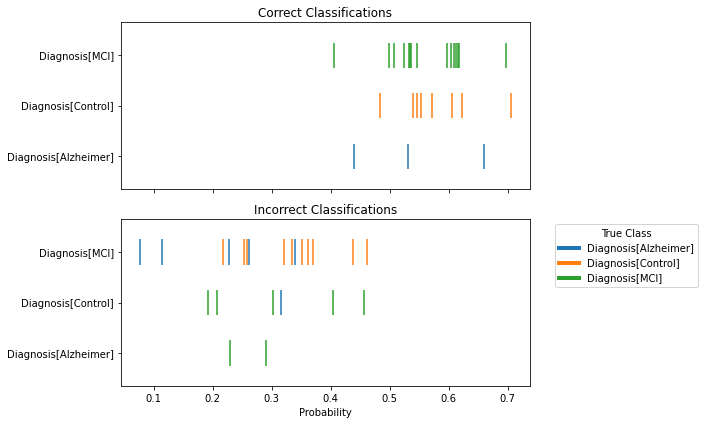

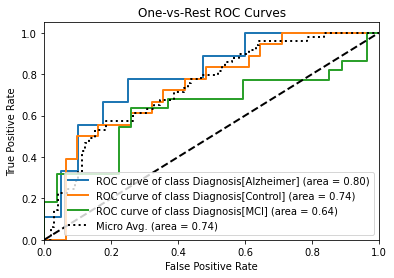

Optimal Thresholds: 
 {0: 0.22769142056804192, 1: 0.4609233173726512, 2: 0.497937708193334}


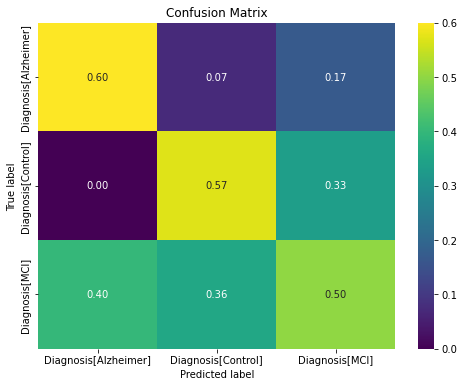

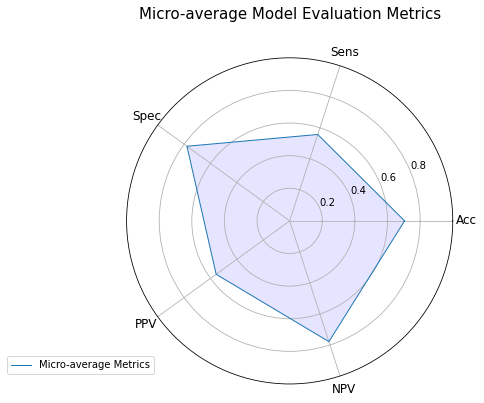

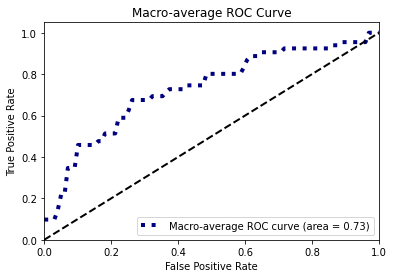

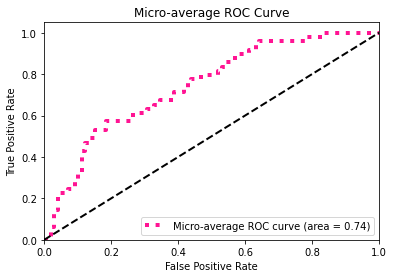

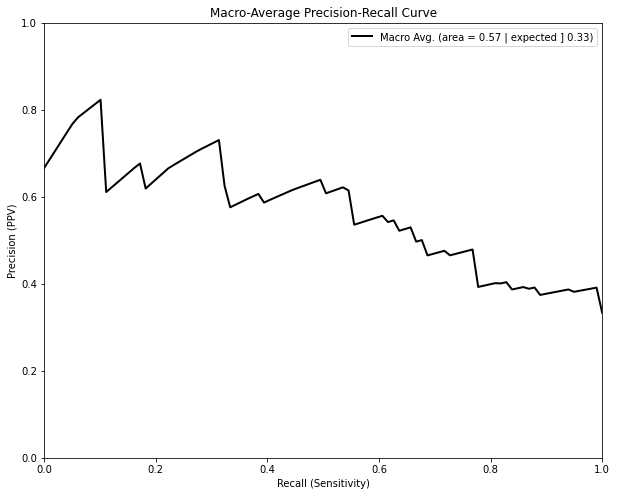

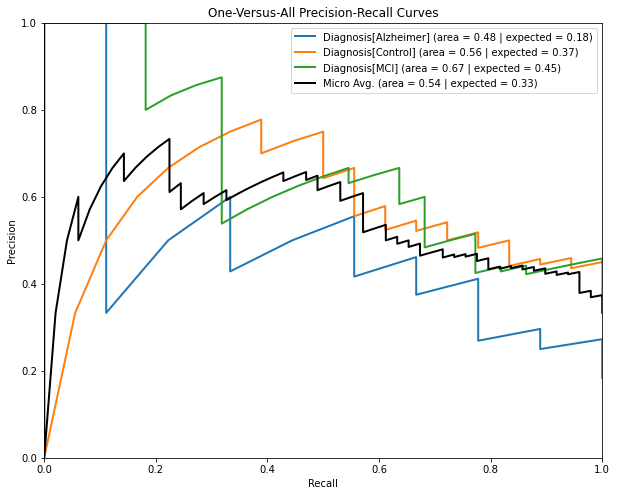

In [167]:
from calvin_utils.statistical_utils.classification_statistics import ComprehensiveMulticlassROC
evaluator = ComprehensiveMulticlassROC(fitted_model=results, observation_df=outcome_matrix, normalization='pred', thresholds=None, out_dir=out_dir)
evaluator.run()

ADVANCED
- code specific manual thresholds to intervene upon classifications

Step 1: relate integer (index) to class

In [134]:
# evaluator.relate_index_to_class()

Step 2: in a dictionary of the indices (corresponding to class), key in the lambda function to edit the probability. 
- Code from left to right, giving priority to each method. 
- Example:
```
>thresholds = {
>            0: lambda probs: 0 if probs[0] > 0.5 else (1 if probs[0] > 0.25 else 2),  # Adjust class_0 predictions
>            1: lambda probs: None,  # No threshold adjustment for class_1
>            2: lambda probs: None   # No threshold adjustment for class_2
>        }
```

In [46]:
# thresholds = {
#     0: lambda prob: 0,  # Always keep class 0
#     1: lambda prob: 1,  # Always keep class 1
#     2: lambda prob: 2 if prob[2] > 0.5 else (1 if prob[1] > 0.3 else 0)  # Conditional adjustment for class 2
# }


Step 3: Check the effect

In [ ]:
# from calvin_utils.statistical_utils.classification_statistics import ComprehensiveMulticlassROC
# evaluator = ComprehensiveMulticlassROC(fitted_model=results, observation_df=outcome_matrix, normalization='pred', thresholds=thresholds, out_dir=out_dir)
# evaluator.run()

Step 4: YOU MUST LOOCV AND VALIDATE IN OUT-OF-SAMPLE DATA.
- add thresholds as an argument to any further calls to ComprehensiveMulticlassROC

Bootstrap the Micro Average AUC

In [ ]:
import matplotlib
from calvin_utils.statistical_utils.classification_statistics import bootstrap_auc
matplotlib.use('Agg')  # Use a non-interactive backend

mean_auc, lower_ci, upper_ci = bootstrap_auc(outcome_matrix, design_matrix, n_iterations=1000)
print(f'Mean AUC: {mean_auc}, 95% CI: ({lower_ci}, {upper_ci})')

Permutation Test Two AUCs

In [ ]:
data_df.columns

In [354]:
f1 = "Diagnosis ~ CerebellumCSF + ParietalCSF + MTLCSF + OccipitalCSF + FrontalCSF + temp_ins_csf + SubcortexCSF"
f2 = "Diagnosis ~ CerebellumGM + ParietalGM + MTLGM + OccipitalGM + FrontalGM + temp_ins_gm + SubcortexGM"

In [ ]:
import matplotlib
matplotlib.use('Agg')  # Use a non-interactive backend
from calvin_utils.statistical_utils.classification_statistics import permute_auc_difference
obs_diff, lower_ci, upper_ci, p_value = permute_auc_difference(data_df, formula1=f1, 
                                                                  formula2=f2,
                                                                  cal_palm=cal_palm, n_iterations=1000)
print(f'Observde AUC Difference: {obs_diff}, 95% CI: ({lower_ci}, {upper_ci}), p-value: {p_value}')

# 06 - Visualize the Regression as a Forest Plot
- This will probably look poor if you ran a regression without standardizing your data. 

In [ ]:
from calvin_utils.statistical_utils.statistical_measurements import MultinomialForestPlot

multinomial_forest = MultinomialForestPlot(model=results, sig_digits=2, out_dir=None, table=False)
multinomial_forest.run()

# 07 - Generate Partial Dependence Plots

In [ ]:
from calvin_utils.statistical_utils.statistical_measurements import PartialDependencePlot
pdp = PartialDependencePlot(formula=formula, data_df=data_df, model=results, design_matrix=design_matrix, outcomes_df=outcome_matrix, data_range=(-1,1), out_dir=None, marginal_method='mean', debug=False)
pdp.run()

# 08 - Visualize the Partial Regression Plots

In [ ]:
from calvin_utils.statistical_utils.statistical_measurements import PartialRegressionPlot
partial_plot = PartialRegressionPlot(model=results, design_matrix=design_matrix, out_dir=out_dir, palette=None)
partial_plot = partial_plot.run()

# 09 - LOOCV

49it [00:00, 419.76it/s]


Taking maximum probability as prediction.
There are 9.0 observations for Diagnosis[Alzheimer]
There are 18.0 observations for Diagnosis[Control]
There are 22.0 observations for Diagnosis[MCI]


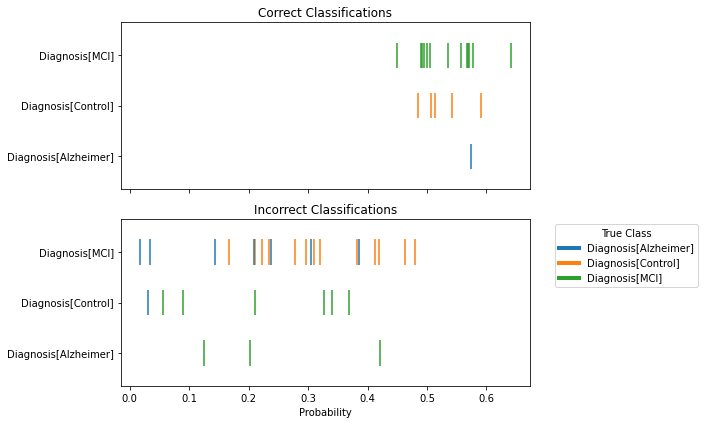

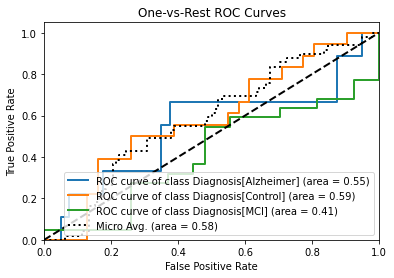

Optimal Thresholds: 
 {0: 0.1425299837933106, 1: 0.4122081380345307, 2: 0.4903608083262711}


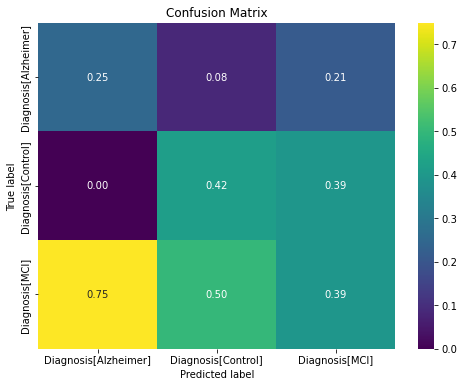

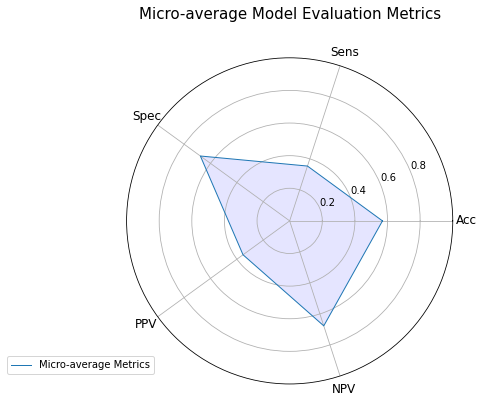

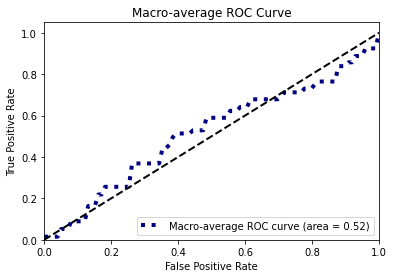

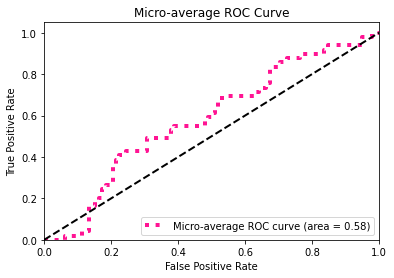

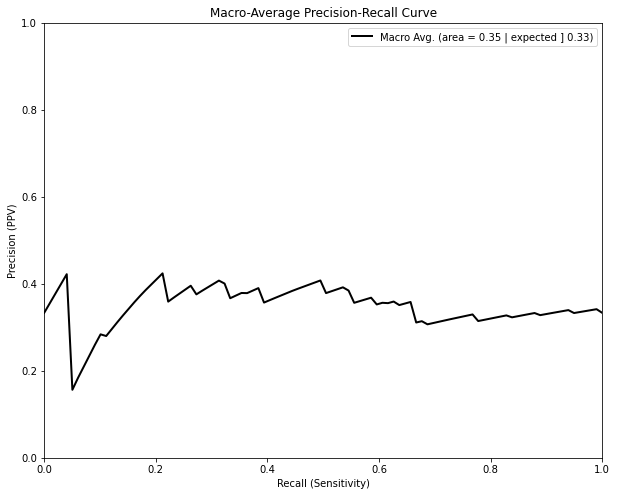

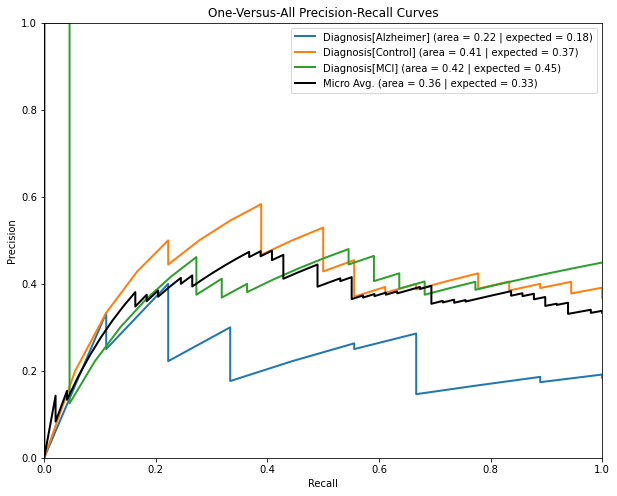

In [168]:
import pandas as pd
from calvin_utils.statistical_utils.logistic_regression import LogisticRegression
from calvin_utils.statistical_utils.classification_statistics import ComprehensiveMulticlassROC
y_true, y_pred, test_prob = LogisticRegression.run_loocv(outcome_matrix, design_matrix)
loocv_evaluator = ComprehensiveMulticlassROC(fitted_model=None, predictions_df=pd.DataFrame(test_prob, columns=outcome_matrix.columns), observation_df=outcome_matrix, normalization='pred', thresholds=None, out_dir=out_dir)
loocv_evaluator.run()

# 10 - Predict Unseen Data

In [30]:
# new_csv_path='/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/atrophy_seeds_2023/metadata/true_ad_patient_data/z0_atrophy_unthresholded.csv'

Option A - Get New Data

In [31]:
# from calvin_utils.permutation_analysis_utils.statsmodels_palm import CalvinStatsmodelsPalm
# # Instantiate the PalmPrepararation class
# new_palm = CalvinStatsmodelsPalm(input_csv_path=new_csv_path, output_dir=out_dir, sheet=sheet)
# # Call the process_nifti_paths method
# other_df = new_palm.read_and_display_data()

In [32]:
# formula

In [33]:
# column_renaming_map = {
#                        'Mesial_Temporal': 'mesial_temporal_eh', 
#                        'parietal': 'parietal_eh', 
#                        'frontal': 'frontal_eh',
#                        'temporal': 'temporal_eh', 
#                        'ventricle':'ventricle_eh',
#                        'occipital': 'occipital_eh'}

In [34]:
# other_df.rename(columns=column_renaming_map, inplace=True)

Option B - Use "Other DF" With all the Other Stuff From Above

In [145]:
other_df = other_df

Prep

In [146]:
# Define the design matrix
other_outcome_matrix, other_design_matrix = cal_palm.define_design_matrix(formula, other_df)
# if len(new_outcome_matrix.columns) != len(outcome_matrix.columns):
#     zero_df = pd.DataFrame(0, index=outcome_matrix.index, columns=outcome_matrix.columns)
#     zero_df.loc[:, new_outcome_matrix.columns] = new_outcome_matrix.loc[:, new_outcome_matrix.columns]
#     new_outcome_matrix = zero_df

Predict

Evaluate

Taking maximum probability as prediction.
There are 109.0 observations for DIAGNOSIS_BL_Str[Alzheimer]
There are 286.0 observations for DIAGNOSIS_BL_Str[MCI]
There are 139.0 observations for DIAGNOSIS_BL_Str[Normal]


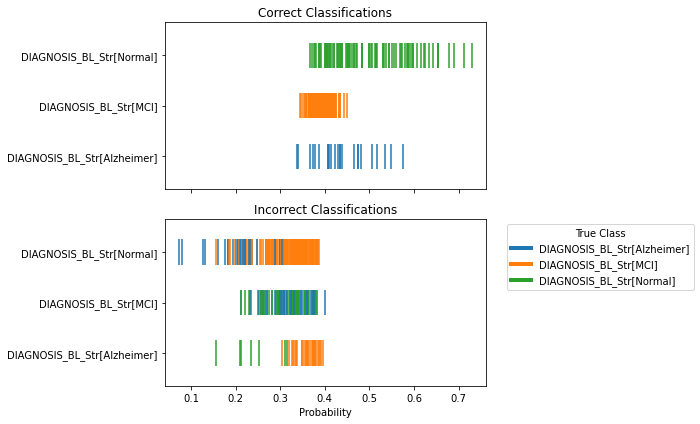

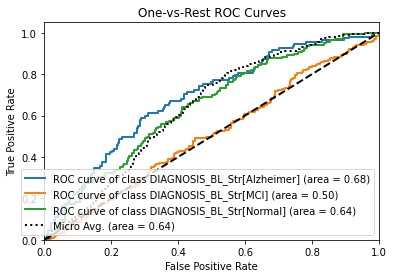

Optimal Thresholds: 
 {0: 0.2959115640860431, 1: 0.32516434549679707, 2: 0.37495795724895853}


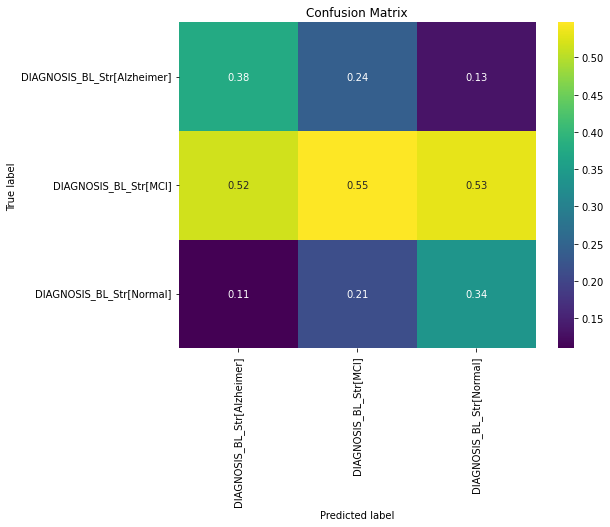

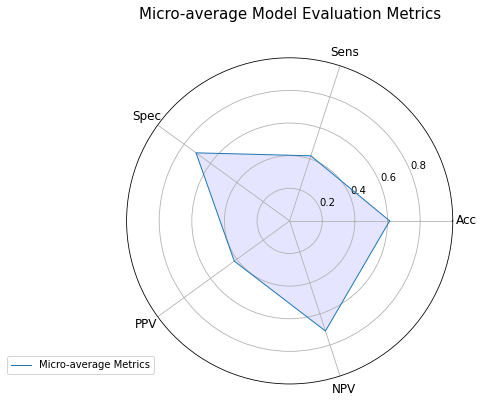

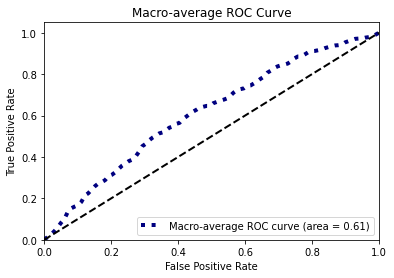

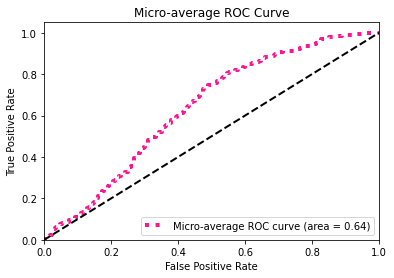

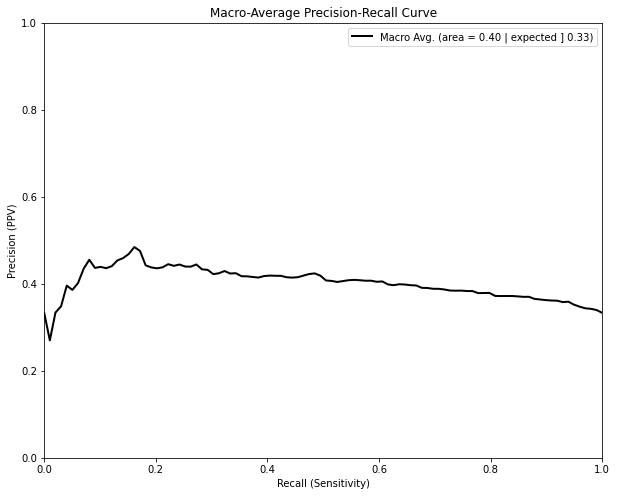

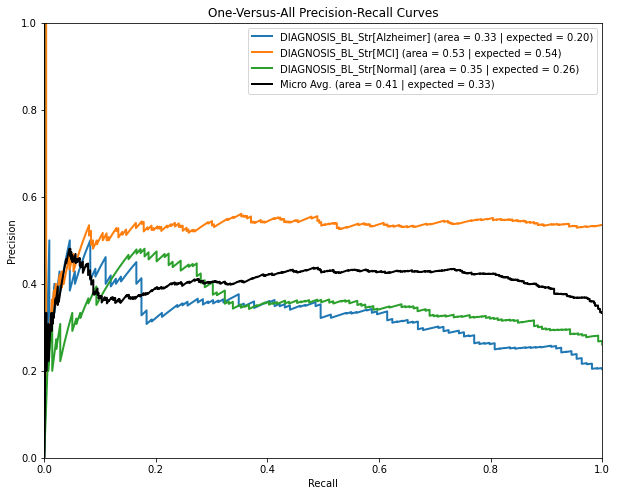

In [147]:
from calvin_utils.statistical_utils.classification_statistics import ComprehensiveMulticlassROC
loocv_evaluator = ComprehensiveMulticlassROC(fitted_model=None, predictions_df=results.predict(other_design_matrix), observation_df=other_outcome_matrix, normalization='pred', thresholds=None, out_dir=out_dir)
loocv_evaluator.run()